In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression #This is for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report #Metrics for classification
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("C:\\AAAAAAAAAA\\AI Masterclass UoSJP\\Day - 28\\Bank.CSV")

data.head()

age  duration  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0   44       210           1.4          93.444          -36.1      4.963   
1   53       138          -0.1          93.200          -42.0      4.021   
2   28       339          -1.7          94.055          -39.8      0.729   
3   39       185          -1.8          93.075          -47.1      1.405   
4   55       137          -2.9          92.201          -31.4      0.869   

   nr_employed  y  
0       5228.1  0  
1       5195.8  0  
2       4991.6  1  
3       5099.1  0  
4       5076.2  1

In [5]:
x = data.iloc[:,:7]
y = data.iloc[:,7]

In [6]:
x

age  duration  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0       44       210           1.4          93.444          -36.1      4.963   
1       53       138          -0.1          93.200          -42.0      4.021   
2       28       339          -1.7          94.055          -39.8      0.729   
3       39       185          -1.8          93.075          -47.1      1.405   
4       55       137          -2.9          92.201          -31.4      0.869   
...    ...       ...           ...             ...            ...        ...   
41183   59       222           1.4          94.465          -41.8      4.866   
41184   31       196           1.1          93.994          -36.4      4.860   
41185   42        62           1.1          93.994          -36.4      4.857   
41186   48       200          -3.4          92.431          -26.9      0.742   
41187   25       112           1.1          93.994          -36.4      4.859   

       nr_employed  
0           5228.1  
1           5195.8  
2           4991.6  
3           5099.1  
4           5076.2  
...            ...  
41183       5228.1  
41184       5191.0  
41185       5191.0  
41186       5017.5  
41187       5191.0  

[41188 rows x 7 columns]

In [7]:
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
# Creating the logistic regression model

model = LogisticRegression()

In [10]:
model

LogisticRegression()

In [11]:
# Training the model with training data

model.fit(x_train, y_train)

LogisticRegression()

In [12]:
model

LogisticRegression()

In [13]:
# Estimated coefficients for parameters of the model

model.coef_

array([[ 0.00102981,  0.00453545, -0.21666711,  0.42441336,  0.05623521,
        -0.27695142, -0.0078621 ]])

In [14]:
# Estimated coefficients for intercept of the model

model.intercept_

array([0.00389661])

In [15]:
# Predict the class of the unseen data

y_pred = model.predict(x_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
# Predicted probabilities for each observation

y_pred_probs = model.predict_proba(x_test)

y_pred_probs #Left side column for 0 and right side column for 1

array([[0.93744175, 0.06255825],
       [0.67198979, 0.32801021],
       [0.99149546, 0.00850454],
       ...,
       [0.99216232, 0.00783768],
       [0.94365278, 0.05634722],
       [0.99442535, 0.00557465]])

In [17]:
# Confusion matrix

confusion_matrix(y_test, y_pred)

array([[7157,  168],
       [ 606,  307]], dtype=int64)

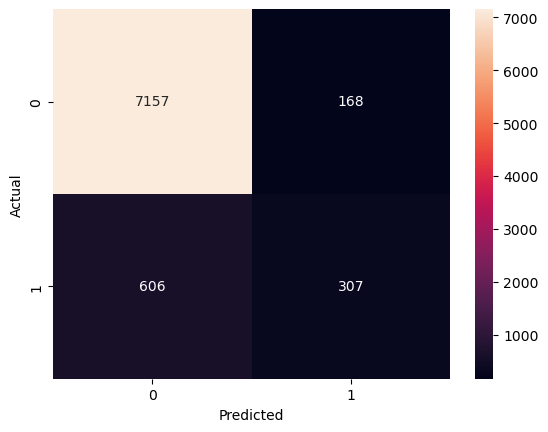

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True , fmt="g")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
# Accuracy & Misclassification Error

accuracy = (np.diag(confusion_matrix(y_test, y_pred)).sum())/len(y_test)

accuracy

0.9060451565914057

In [20]:
accuracy_score(y_test,y_pred)

0.9060451565914057

In [21]:
MCE=1-accuracy
MCE

0.09395484340859428

In [23]:
# Classification report with more metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7325
           1       0.65      0.34      0.44       913

    accuracy                           0.91      8238
   macro avg       0.78      0.66      0.70      8238
weighted avg       0.89      0.91      0.89      8238

